# Introduction to Recommendation systems

In this modern world we are overloaded with data and this data provides us the useful information. But it's not possible for the user to extract the information which interest them from these data. In order to help the user to find out information about the product , recommedation systems where developed. 

Recommeder system creates a similarity between the user and items and exploits the similarity between user/item to make recommendations.


What recommeder system can solve ?

1. It can help the user to find the right product.
2. It can increase the user engagement. For example, there's 40% more click on the google news due to recommendation.
3. It helps the item providers to deliver the items to the right user.In Amazon , 35 % products get sold due to recommendation.
4. It helps to make the contents more personalized.In Netflix most of the rented movies are from recommendations.


# Types of recommendations

There are mainly 6 types of the recommendations systems :-

1. Popularity based systems :- It works by recommeding items viewed and purchased by most people and are rated high.It is not a personalized recommendation.
2. Classification model based:- It works by understanding the features of the user and applying the classification algorithm to decide whether the user is     interested or not in the prodcut.
3. Content based recommedations:- It is based on the information on the contents of the item rather than on the user opinions.The main idea is if the user likes an item then he or she will like the "other" similar item.
4. Collaberative Filtering:- It is based on assumption that people like things similar to other things they like, and things that are liked by other people with similar taste. it is mainly of two types:
 a) User-User 
 b) Item -Item
 
5. Hybrid Approaches:- This system approach is to combine collaborative filtering, content-based filtering, and other approaches . 
6. Association rule mining :- Association rules capture the relationships between items based on their patterns of co-occurrence across transactions.



# Attribute Information:

● customer_id : Every user identified with a unique id 

● product_id : Every product identified with a unique id 

● review_score : Rating of the corresponding product by the corresponding user 




# Import Libraries 

In [3]:
import dask.dataframe as dd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/amazon-product-reviews/ratings_Electronics (1).csv
/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv
/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv
/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv


# Load the Dataset and Add headers

In [4]:
review_data = pd.read_csv("../input/brazilian-ecommerce/olist_order_reviews_dataset.csv")
orders_data = pd.read_csv("../input/brazilian-ecommerce/olist_orders_dataset.csv")


Merging reviews and orders 

In [6]:
data1 = review_data.merge(orders_data, on= 'order_id')
data1.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14 00:00:00
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09 00:00:00
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10 00:00:00
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09 00:00:00


Since, we don't need these two data frames any longer so i deleted them.

In [7]:
del review_data
del orders_data
gc.collect()

8

In [8]:
order_items_data = pd.read_csv("../input/brazilian-ecommerce/olist_order_items_dataset.csv")
order_items_data.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Merging data1 and order_items

In [9]:
data2 = data1.merge(order_items_data,on = 'order_id')
data2

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00,1,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00,2,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14 00:00:00,1,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-06 12:48:39,79.79,8.30
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-02-08 10:31:15,149.00,45.12
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10 00:00:00,1,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,42.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113317,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,d0d7086dea6fcf42b9b690b9f3745c58,delivered,2017-12-03 21:45:23,2017-12-03 22:08:00,2017-12-07 19:17:29,2017-12-08 17:19:00,2017-12-20 00:00:00,1,3a33c980b62eb1ef3b8ae61b6fc6fe55,46dc3b2cc0980fb8ec44634e21d2718e,2017-12-07 22:08:00,199.99,9.77
113318,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,fcc7b1caafe3b77fd587bab964c4d1fb,delivered,2018-03-18 09:52:19,2018-03-18 10:08:04,2018-03-19 23:51:29,2018-03-21 17:44:08,2018-04-06 00:00:00,1,8ba0118a487ec8671aed57e5ef846574,17ca9b9e9b9ef8fdb529001b49ebb50f,2018-03-22 10:08:04,215.97,15.59
113319,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,3aa00401736823c73e9fe8683328fa6b,delivered,2018-06-22 16:47:28,2018-06-22 18:15:29,2018-06-25 12:58:00,2018-06-30 12:57:51,2018-07-16 00:00:00,1,73a7fbf8c1048131f3b531af31bcdf0e,8d956fec2e4337affcb520f56fd8cbfd,2018-06-26 18:15:29,50.95,15.46
113320,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43,8df587ce8a11ee97b3de9ef3405245c2,delivered,2017-12-10 18:44:23,2017-12-12 03:59:36,2017-12-12 18:05:41,2017-12-14 22:04:30,2017-12-29 00:00:00,1,54caa022e792f1ce31d4a656cecaa802,25cf099de44674fde97473224f9d59ab,2017-12-19 03:59:36,10.00,7.78


In [10]:
del order_items_data
gc.collect()

0

from above dataset we just need customer_id, product_id and review_score(Ratings) as they are necessary for user-product interaction matrix. 

In [11]:
electronics_data = data2[['customer_id','product_id','review_score']]
electronics_data

,customer_id,product_id,review_score
0,41dcb106f807e993532d446263290104,fd25ab760bfbba13c198fa3b4f1a0cd3,4
1,41dcb106f807e993532d446263290104,fd25ab760bfbba13c198fa3b4f1a0cd3,4
2,8a2e7ef9053dea531e4dc76bd6d853e6,be0dbdc3d67d55727a65d4cd696ca73c,5
3,e226dfed6544df5b7b87a48208690feb,d1c427060a0f73f6b889a5c7c61f2ac4,5
4,de6dff97e5f1ba84a3cd9a3bc97df5f6,52c80cedd4e90108bf4fa6a206ef6b03,5
...,...,...,...
113317,d0d7086dea6fcf42b9b690b9f3745c58,3a33c980b62eb1ef3b8ae61b6fc6fe55,5
113318,fcc7b1caafe3b77fd587bab964c4d1fb,8ba0118a487ec8671aed57e5ef846574,5
113319,3aa00401736823c73e9fe8683328fa6b,73a7fbf8c1048131f3b531af31bcdf0e,4
113320,8df587ce8a11ee97b3de9ef3405245c2,54caa022e792f1ce31d4a656cecaa802,1


In [12]:
del data1
del data2
gc.collect()

0

In [13]:
# Display the data

electronics_data.head()


,customer_id,product_id,review_score
0,41dcb106f807e993532d446263290104,fd25ab760bfbba13c198fa3b4f1a0cd3,4
1,41dcb106f807e993532d446263290104,fd25ab760bfbba13c198fa3b4f1a0cd3,4
2,8a2e7ef9053dea531e4dc76bd6d853e6,be0dbdc3d67d55727a65d4cd696ca73c,5
3,e226dfed6544df5b7b87a48208690feb,d1c427060a0f73f6b889a5c7c61f2ac4,5
4,de6dff97e5f1ba84a3cd9a3bc97df5f6,52c80cedd4e90108bf4fa6a206ef6b03,5


In [14]:
#Shape of the data
electronics_data.shape

(113322, 3)

In [15]:
#Check the datatypes
electronics_data.dtypes

customer_id     object
product_id      object
review_score     int64
dtype: object

In [16]:
electronics_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 113322 entries, 0 to 113321
Data columns (total 3 columns):
customer_id     113322 non-null object
product_id      113322 non-null object
review_score    113322 non-null int64
dtypes: int64(1), object(2)
memory usage: 3.5+ MB


In [17]:

gc.collect()

0

In [18]:
#Five point summary 

electronics_data.describe()['review_score'].T


count    113322.000000
mean          4.015469
std           1.400166
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: review_score, dtype: float64

## Handling Missing values


In [19]:
#Check for missing values
print('Number of missing values across columns: \n',electronics_data.isnull().sum())



Number of missing values across columns: 
 customer_id     0
product_id      0
review_score    0
dtype: int64


## Ratings

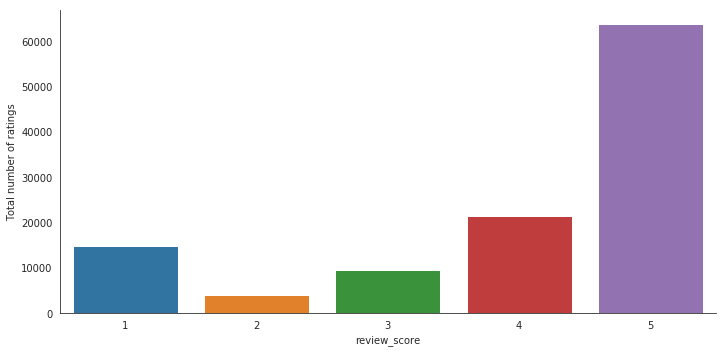

In [20]:
# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.factorplot("review_score", data=electronics_data, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

## Unique Users and products


In [21]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",electronics_data.shape[0])
print("Total No of Users   :", len(np.unique(electronics_data.customer_id)))
print("Total No of products  :", len(np.unique(electronics_data.product_id)))

Total data 
--------------------------------------------------

Total no of ratings : 113322
Total No of Users   : 98666
Total No of products  : 32951


# Analyzing the rating

In [22]:
#Analysis of rating given by the user 

no_of_ratings_given_by_users = electronics_data.groupby(by='customer_id')['review_score'].count().sort_values(ascending=False)

no_of_ratings_given_by_users

customer_id
be1c4e52bb71e0c54b11a26b8e8d59f2    22
fc3d1daec319d62d49bfb5e1f83123e9    21
bd5d39761aa56689a265d95d8d32b8be    20
be1b70680b9f9694d8c70f41fa3dc92b    20
10de381f8a8d23fff822753305f71cae    15
                                    ..
a5ee2f393f8a0fd11bddaf08b7e44212     1
a5ee477d5af9fcafb0b8fee8431d2fbe     1
a5f0b30823ffc4dc423a99e3c1117093     1
a5f0f602b9567ebcc40450094befe7fb     1
00012a2ce6f8dcda20d059ce98491703     1
Name: review_score, Length: 98666, dtype: int64

It means user(be1c4e52bb71e0c54b11a26b8e8d59f2) have rated 22 times on amazon's website for different products

In [23]:
no_of_ratings_given_by_users.describe()

count    98666.000000
mean         1.148542
std          0.554778
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         22.000000
Name: review_score, dtype: float64

In [24]:
#Analysis of ratings for every product

no_of_rated_products_per_user = electronics_data.groupby(by='product_id')['review_score'].count().sort_values(ascending=False)

no_of_rated_products_per_user

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    491
422879e10f46682990de24d770e7f83d    487
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    391
                                   ... 
90e72f6ceee757db03bba3a4eaef5dc4      1
90ecafcda7c811f567aff494b2981812      1
90eda8c813935dfe3841ad5119a92a32      1
90f0c2783d7dead12d957eda9fdc111a      1
00066f42aeeb9f3007548bb9d3f33c38      1
Name: review_score, Length: 32951, dtype: int64

It means Product(aca2eb7d00ea1a7b8ebd4e68314663af) have been rated 527 times.

In [25]:
product_avg_rate = electronics_data.groupby(by='product_id')['review_score'].mean().sort_values(ascending=False)

In [26]:
product_avg_rate.describe()

count    32951.000000
mean         4.031671
std          1.224677
min          1.000000
25%          3.500000
50%          4.500000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64

In [27]:
new_df = electronics_data

In [28]:
del electronics_data
gc.collect()

0

# Collaberative filtering (Item-Item recommedation)

Collaborative filtering is commonly used for recommender systems. These techniques aim to fill in the missing entries of a user-item association matrix. We are going to use collaborative filtering (CF) approach.
CF is based on the idea that the best recommendations come from people who have similar tastes. In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item.Collaborative filtering has two sub-categories that are generally called memory based and model-based approaches.



Surprise is a python library for Recommendation system

In [29]:
from surprise import KNNWithMeans, KNNBasic, KNNWithZScore, KNNBaseline
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import GridSearchCV
from surprise import SVD
import os
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate

In [30]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(new_df,reader)

In [31]:
# single value decomposition
algo = SVD()

# Run 5-fold cross-validation and then print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2780  1.2740  1.2718  1.2773  1.2793  1.2761  0.0027  
MAE (testset)     1.0070  1.0071  1.0038  1.0063  1.0091  1.0066  0.0017  
Fit time          7.72    7.83    17.13   19.31   12.62   12.92   4.72    
Test time         0.20    0.31    0.33    0.32    0.33    0.30    0.05    


{'test_rmse': array([1.27800578, 1.2739819 , 1.2718405 , 1.27726178, 1.27927391]),
 'test_mae': array([1.00697043, 1.00705673, 1.00375119, 1.00625999, 1.00908192]),
 'fit_time': (7.7162675857543945,
  7.831320285797119,
  17.127418518066406,
  19.306766033172607,
  12.62175440788269),
 'test_time': (0.20397710800170898,
  0.3147761821746826,
  0.3280460834503174,
  0.31554722785949707,
  0.32941627502441406)}

In [32]:
#Splitting the dataset
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)

In [33]:
del data
gc.collect()

0

Different variants of KNN algorithm

In [34]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
models = []
models.append(('KNNWithMeans',KNNWithMeans(k=5, sim_options={'name': 'cosine', 'user_based': False})))
models.append(('KNNBasic', KNNBasic(k=5, sim_options={'name': 'cosine', 'user_based': False})))
models.append(('KNNWithZScore', KNNWithZScore(k=5, sim_options={'name': 'cosine', 'user_based': False})))
models.append(('KNNBaseline', KNNBaseline(k=5, sim_options={'name': 'cosine', 'user_based': False})))

In [ ]:
for name, model in models:
    model.fit(trainset)
    test_pred = model.test(testset)
    print("RMSE of ",name)
    accuracy.rmse(test_pred, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.


RMSE of  KNNWithMeans
RMSE: 1.2658


1.2658453685246012

Computing the cosine similarity matrix...
Done computing similarity matrix.


RMSE of  KNNBasic
RMSE: 1.2587


1.2586523743663753

Results of other two algorithms are as follows :     
* RMSE of KNNWithZScore        <br />RMSE : 1.26(item based, all instances)
* RMSE of KNNBaseline          <br />RMSE : 1.24(item based, all instances)

In [ ]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
models = []
models.append(('KNNWithMeans',KNNWithMeans(k=5, sim_options={'name': 'cosine', 'user_based': True})))
models.append(('KNNBasic', KNNBasic(k=5, sim_options={'name': 'cosine', 'user_based': True})))
models.append(('KNNWithZScore', KNNWithZScore(k=5, sim_options={'name': 'cosine', 'user_based': True})))
models.append(('KNNBaseline', KNNBaseline(k=5, sim_options={'name': 'cosine', 'user_based': True})))
for name, model in models:
    model.fit(trainset)
    test_pred = model.test(testset)
    print("RMSE of ",name)
    accuracy.rmse(test_pred, verbose=True)

Result of user based collaborative filtering
* RMSE of KNNMeans        <br />RMSE : 1.31(User based, with 55,000 instances)
* RMSE of KNNBasic        <br />RMSE : 1.36(User based, with 55,000 instances)
* RMSE of KNNWithZScore   <br />RMSE : 1.29(User based, with 55,000 instances)
* RMSE of KNNBaseline     <br />RMSE : 1.34(User based, with 55,000 instances)

It is bit difficult to show all the results in one notbook because modeling consumes all available memory, i obtained these results by commenting all others and running one algorithm at a time. 


# Reference
This notebook is greatly inspired by [this kaggle ](https://www.kaggle.com/saurav9786/recommender-system-using-amazon-reviews) notebook.